In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [2]:
os.chdir('C:\\Users\\Ajay Jacob\\Documents\\Python Scripts\\11. Capstone Case Study - Predict Cred Card Consumption')

In [3]:
# Fetching the data

consumption = pd.read_excel('CreditConsumptionData.xlsx')
behaviour = pd.read_excel('CustomerBehaviorData.xlsx')
demographic = pd.read_excel('CustomerDemographics.xlsx')

In [4]:
df=pd.merge(left=behaviour,right=consumption,left_on=consumption['ID'],right_on=behaviour['ID'],how='inner')

df=df.drop('key_0',axis=1)

df=pd.merge(left=df,right=demographic,left_on=df['ID_y'],right_on=demographic['ID'],how='inner')

df.head()

df=df.drop(['key_0','ID_x','ID_y'],axis=1)

df.head(2)

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.2,130000.0,300500.0,12174.0,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.0,1,108,97916.0,45253.64,47635.0,2,18,19947.0,Y,3448.84,10832.0,14081,current,M,47,MEDIUM,8.1,8,814.0,1,17.0
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.0,3.0,610000.0,2351.0,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.0,1,4,25125.0,12912.33,18369.0,3,49,20585.0,Y,3812.69,179050.0,5124,current,F,27,MEDIUM,6.3,7,249.0,1,7.0


### Performing Exploratory Data Analysis

In [5]:
# checking for missing values

df.isnull().sum()

cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
vehicle_loan_closed                0
investment_1                       0
investment_2                       0
investment_3                       2
investment_4                       0
debit_amount_apr                   0
credit_amount_apr                  0
debit_count_apr                    1
credit_count_apr                   0
max_credit_amount_apr              0
debit_amount_may                   0
c

In [6]:
df.isnull().sum().sum()

5017

###### Out of 5017 missing values, we need to make predictions for 5000 of them. Hence, we will create a new data frame for those values. For the remaining 17 values we can choose to drop them since they are very less in number.

In [7]:
null_cc_cons = pd.isnull(df['cc_cons'])
null_cc_cons

0        False
1        False
2        False
3        False
4        False
         ...  
19995     True
19996     True
19997     True
19998     True
19999     True
Name: cc_cons, Length: 20000, dtype: bool

In [8]:
pred_df = df[null_cc_cons].reset_index(drop=True)

In [9]:
pred_df.head()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,2795.45,1290.0,6141.05,676.50,9146.10,15479.00,4.0,10,4,47,56,6,125000,1,1,1.0,1,13.80,376600.50,1633.0,-5715.49023,27646.84,44341.00,16.0,36,24485.0,23512.67,41755.0,24,20,9750.0,30527.88,31271.00,3,12,25945.92,Y,1170.49,NaN,17591,current,M,37,MEDIUM,11.9,4,575.0,1,16.0
1,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10,4,50,38,31,59000,1,1,1.0,1,101891.25,470000.00,891.0,35346.00000,32247.25,21946.00,42.0,5,3375.0,15049.44,130299.0,43,40,16967.0,14342.83,16582.00,6,39,12214.00,Y,16447.45,NaN,13541,current,M,33,MEDIUM,7.8,6,394.0,0,19.0
2,5985.20,6189.0,2696.09,766.00,716.00,4133.22,7.0,30,5,24,27,2,49999,1,1,1.0,1,53374.97,674291.83,54101.0,2557.00000,63169.00,36616.50,41.0,6,14950.0,133659.00,40422.0,42,35,36398.0,32503.16,33539.54,5,9,13215.00,Y,2622.28,NaN,13431,current,M,53,LOW,33.0,10,324.0,1,15.0
3,2105.93,18225.0,34763.56,167.00,4260.27,20185.00,1.0,99,71,5,1,11,520000,1,1,1.0,1,9118.35,470000.00,5905.0,5464.00000,39442.80,43173.38,46.0,1,235844.0,99686.03,48148.0,3,5,97825.0,93572.42,109429.75,21,0,72317.00,Y,340.79,NaN,8687,current,M,33,MEDIUM,7.8,5,370.0,1,7.0
4,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10,47,5,25,1,152000,1,1,1.0,1,12850544.36,101.24,130000.0,1332.00000,8937.00,15232.00,11.0,1,14495.0,190374.25,25926.0,70,75,27936.0,19011.50,41401.00,6,35,42344.00,Y,2812.20,NaN,14727,current,M,62,LOW,12.6,9,505.0,1,3.0


In [10]:
pred_df.isnull().sum().sum()

5008

In [11]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [12]:
# Exploring numerical variables. Numerical variables consist of Continuous and Discrete variables

df_num = df.select_dtypes(exclude='object')
df_num.head()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.2,130000.00,300500.0,12174.0,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.0,3448.84,10832.0,14081,47,8.1,8,814.0,1,17.0
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.0,3.00,610000.0,2351.0,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.0,3812.69,179050.0,5124,27,6.3,7,249.0,1,7.0
2,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,4,62,42,360000,1,1,1.0,1,27324.0,176487.60,2156.0,3735.0,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.0,9432.90,888.0,1119,35,4.5,9,958.0,0,9.0
3,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,24,12,58,155000,1,1,1.0,1,370776.0,63000.00,26241.0,0.0,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.0,144.61,1856.0,2390,58,34.2,10,945.0,1,12.0
4,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,7,5,80,362000,1,1,1.0,1,10006.2,7216.53,13873.0,-4679.0,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.0,1887.89,290.0,4322,32,10.8,10,249.0,1,6.0


In [13]:
# Total number of numerical variables
len(df_num.columns)

45

In [14]:
# Number of Discrete Variables

df_num_dis=[x for x in df_num if len(df[x].unique())<25]
len(df_num_dis)

7

In [15]:
df_num[df_num_dis].head()

,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction
0,1,1,1.0,1,8,1,17.0
1,1,1,1.0,1,7,1,7.0
2,1,1,1.0,1,9,0,9.0
3,1,1,1.0,1,10,1,12.0
4,1,1,1.0,1,10,1,6.0


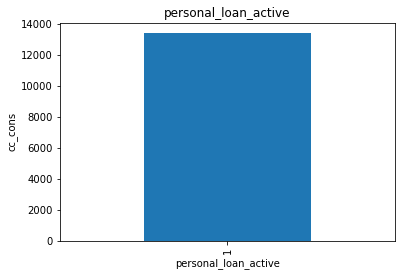

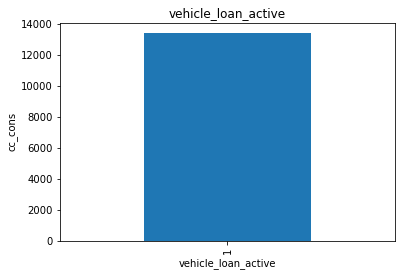

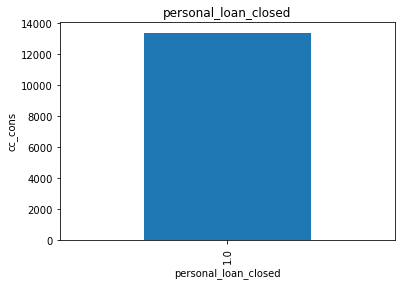

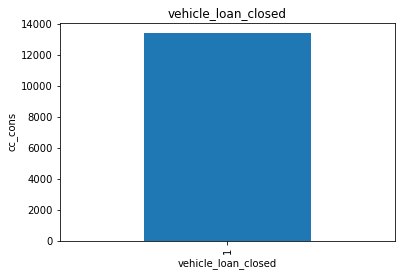

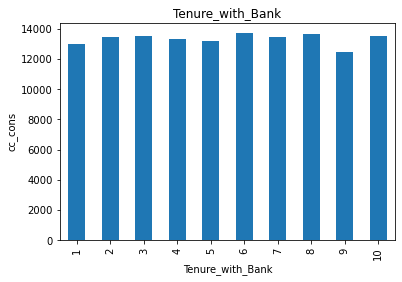

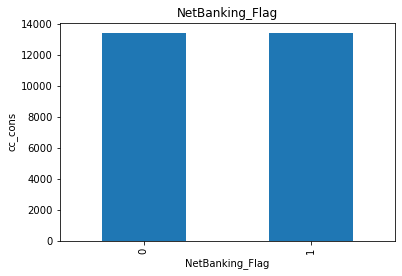

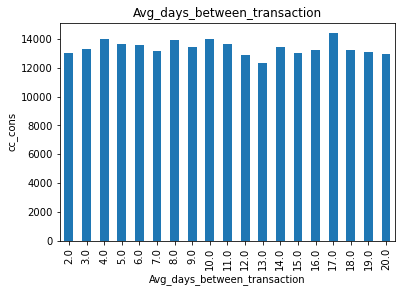

In [16]:
for i in df_num_dis:
    df.groupby(i)['cc_cons'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('cc_cons')
    plt.title(i)
    plt.show()

##### Few of the discrete variables have a relationship with the target variable-'cc_cons'

In [17]:
# Number of Continuous variables

df_num_cont=[x for x in df_num if len(df[x].unique())>25]
len(df_num_cont)

38

In [18]:
df_num[df_num_cont].head()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,ID,age,Emp_Tenure_Years,region_code
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,53,1,42,358000,331.2,130000.00,300500.0,12174.0,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.0,3448.84,10832.0,14081,47,8.1,814.0
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,4,1,17,114000,5809950.0,3.00,610000.0,2351.0,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.0,3812.69,179050.0,5124,27,6.3,249.0
2,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,4,62,42,360000,27324.0,176487.60,2156.0,3735.0,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.0,9432.90,888.0,1119,35,4.5,958.0
3,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,24,12,58,155000,370776.0,63000.00,26241.0,0.0,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.0,144.61,1856.0,2390,58,34.2,945.0
4,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,7,5,80,362000,10006.2,7216.53,13873.0,-4679.0,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.0,1887.89,290.0,4322,32,10.8,249.0


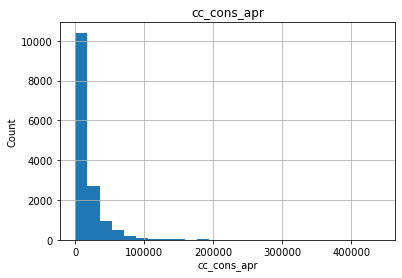

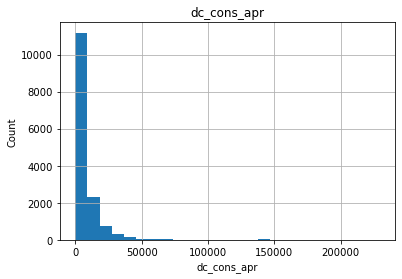

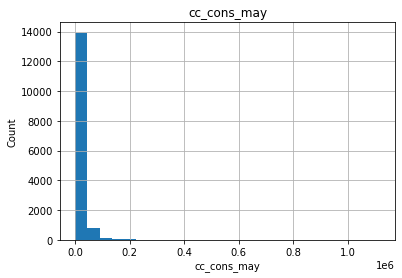

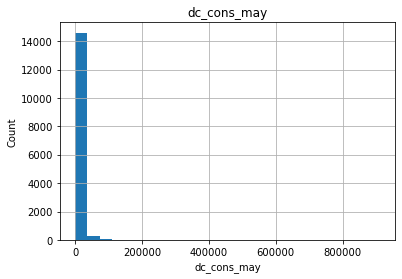

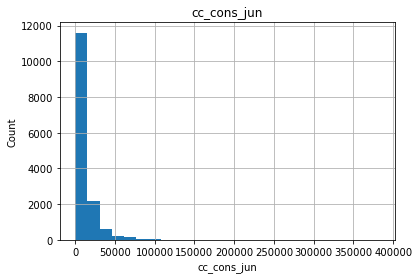

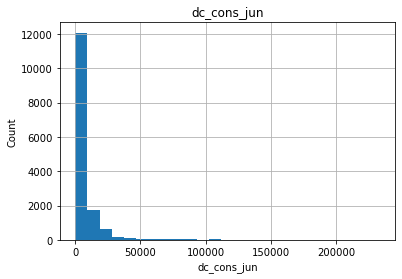

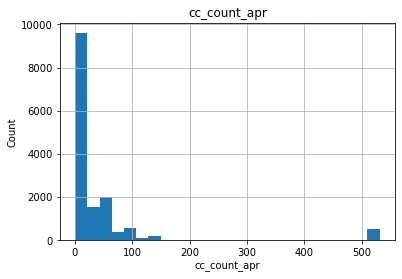

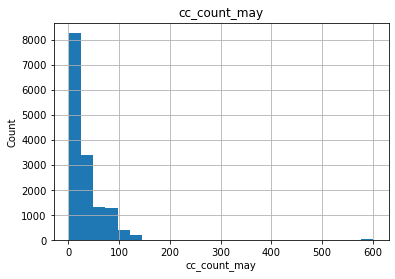

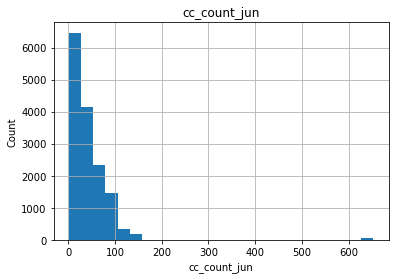

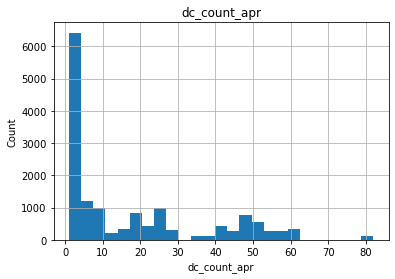

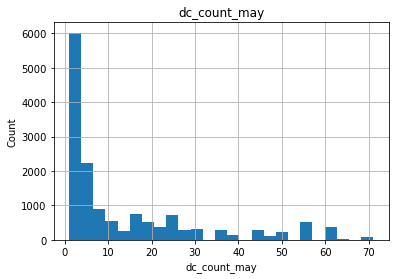

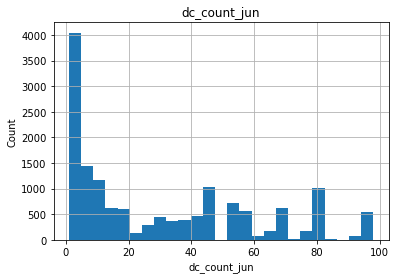

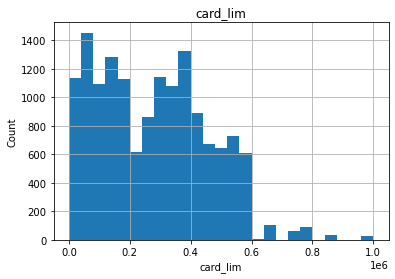

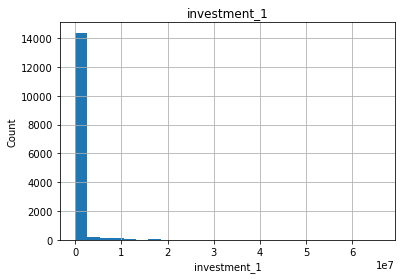

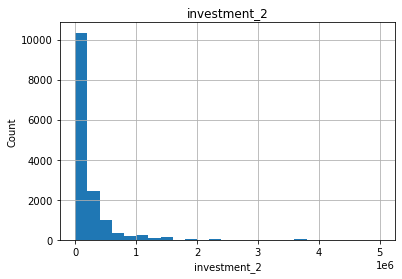

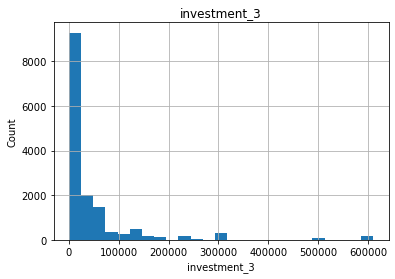

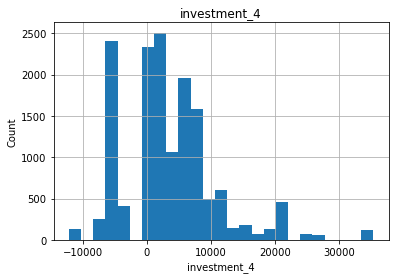

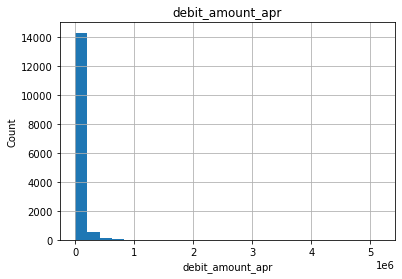

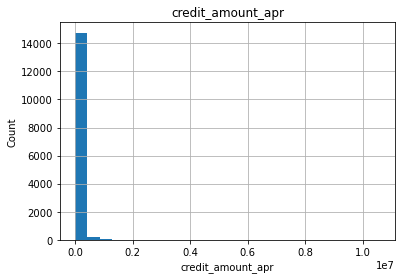

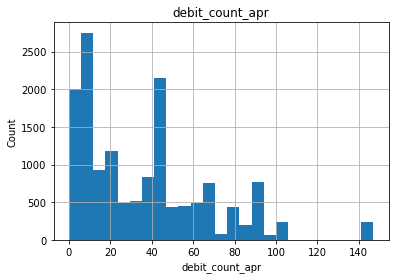

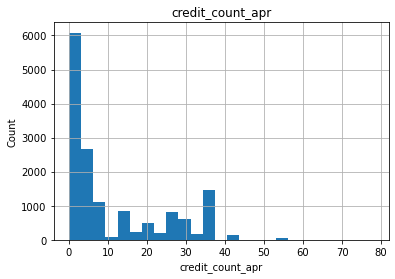

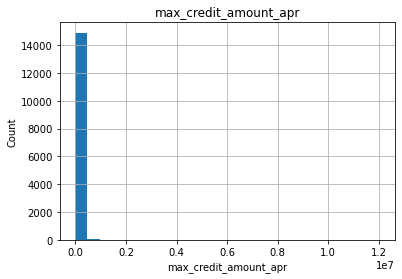

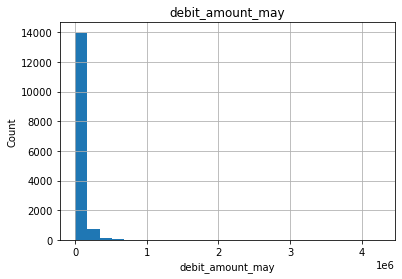

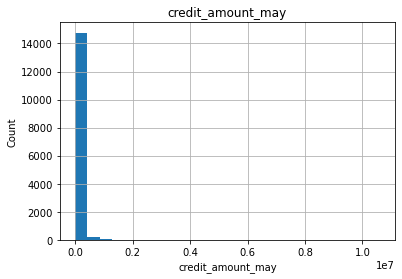

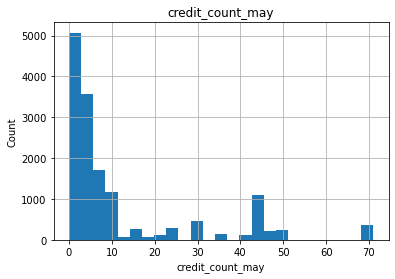

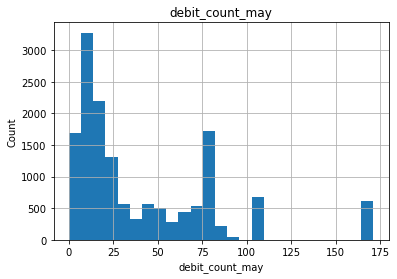

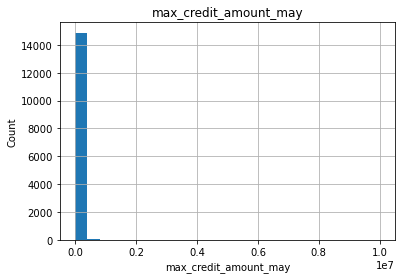

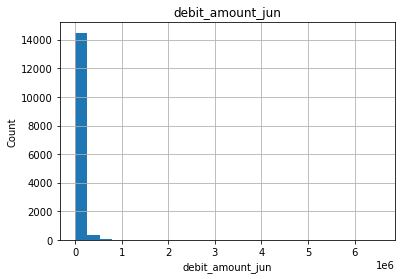

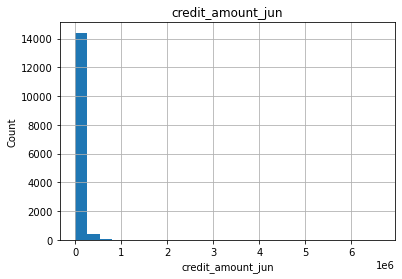

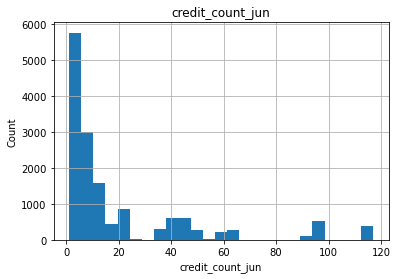

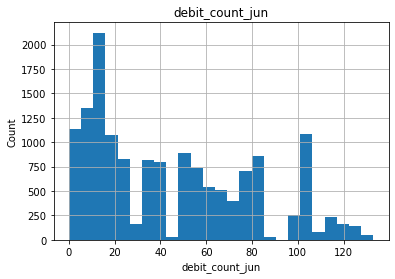

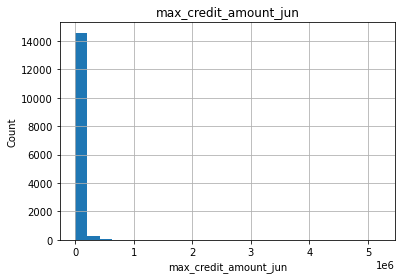

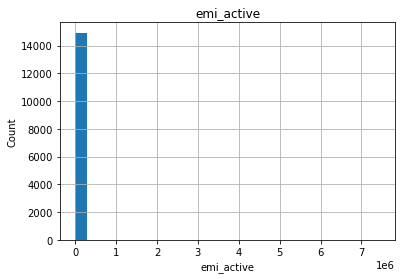

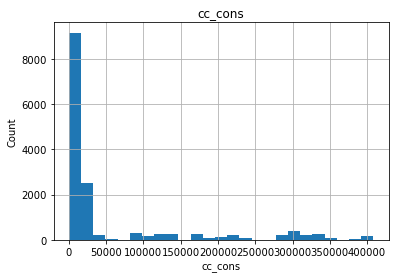

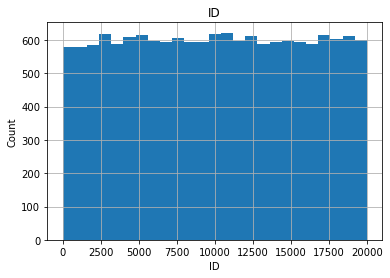

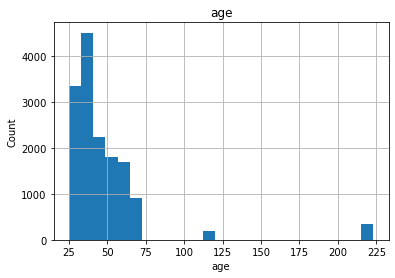

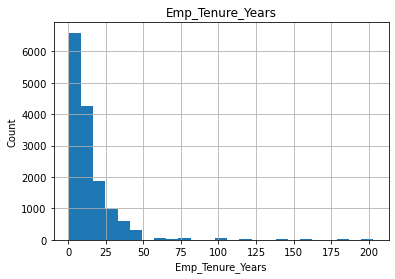

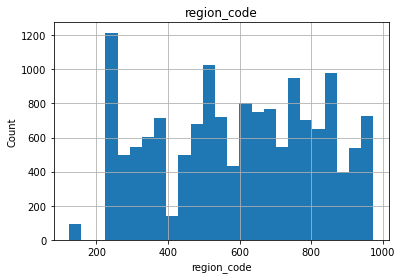

In [19]:
for i in df_num_cont:
    df[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

In [20]:
# Correlation b/w numerical columns

corr= df_num.corr()

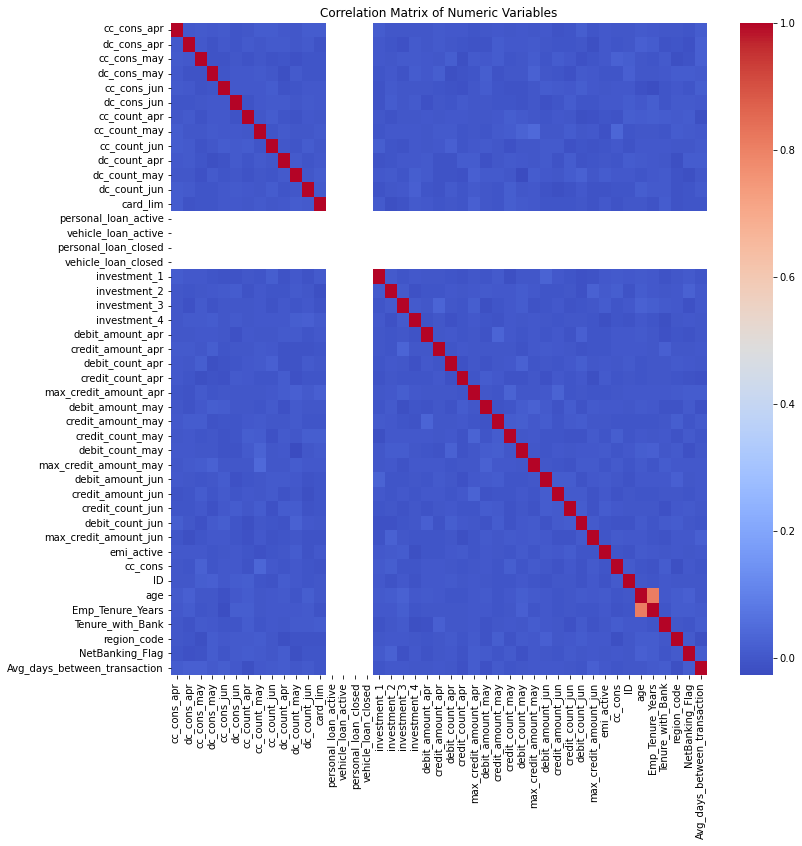

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

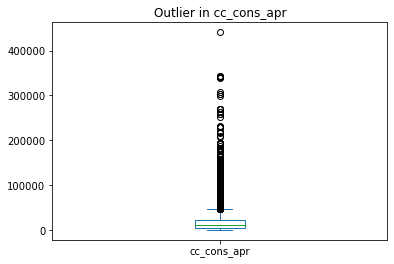

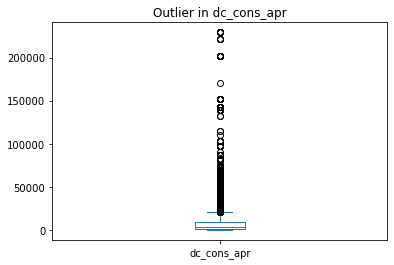

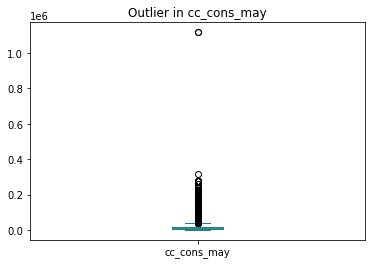

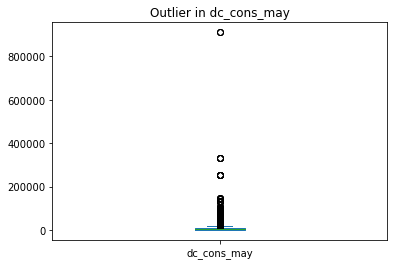

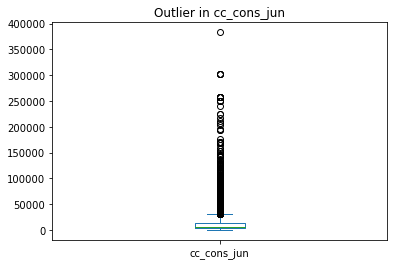

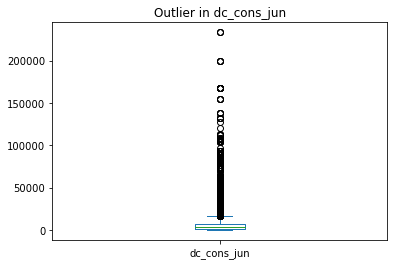

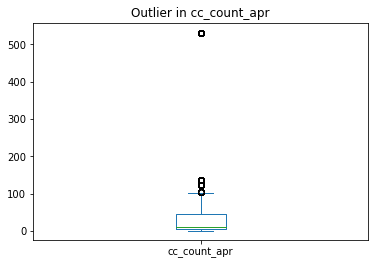

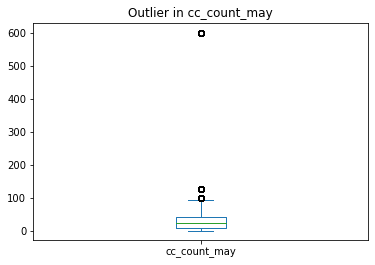

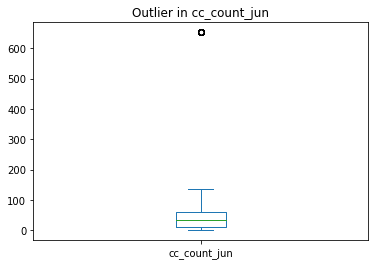

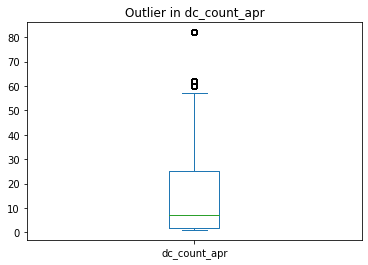

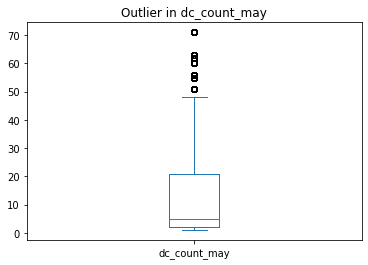

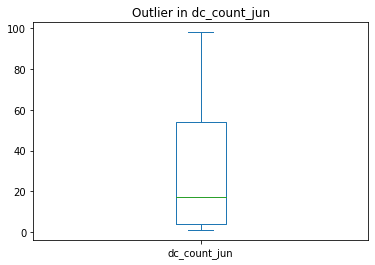

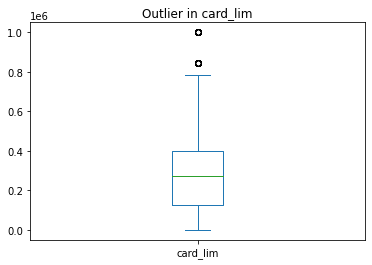

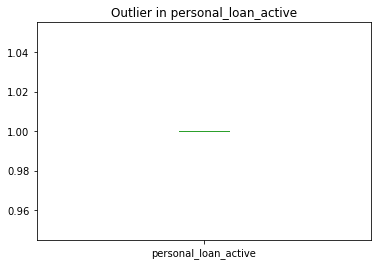

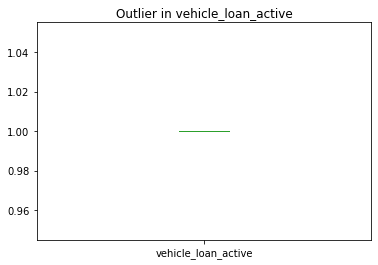

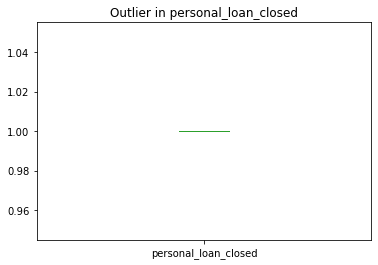

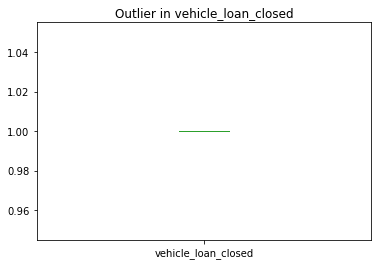

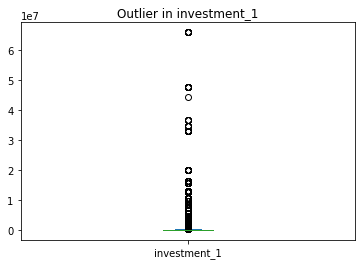

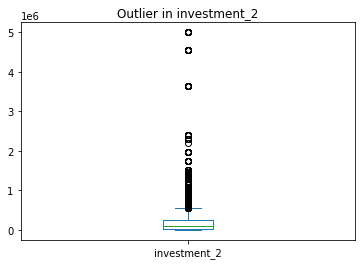

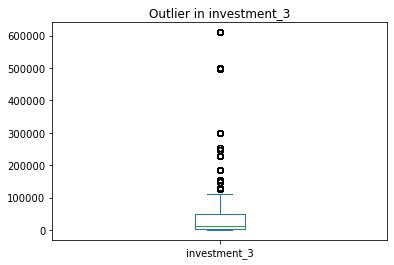

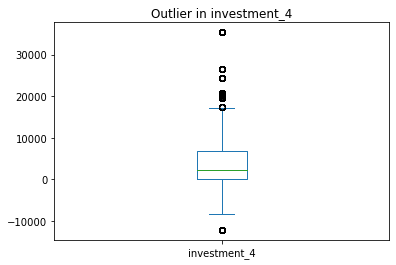

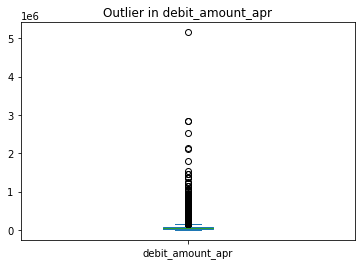

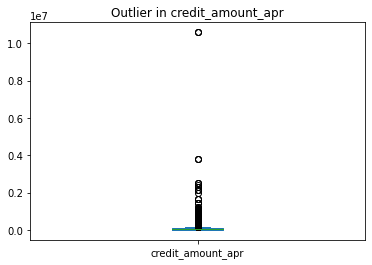

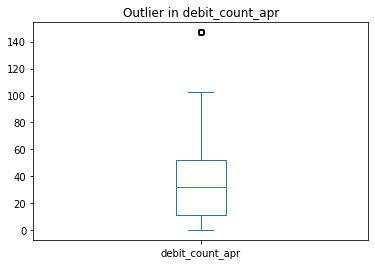

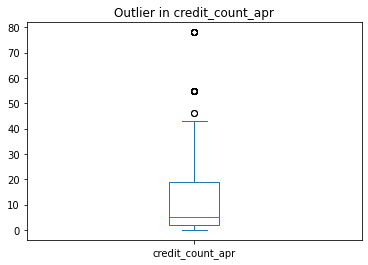

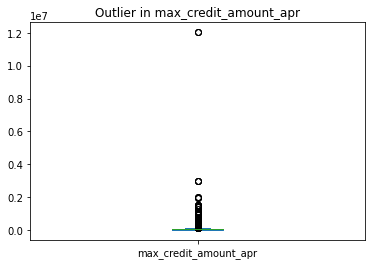

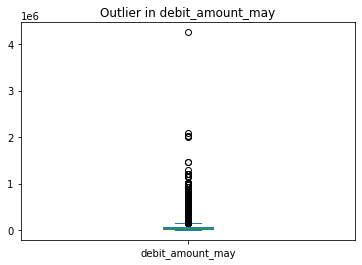

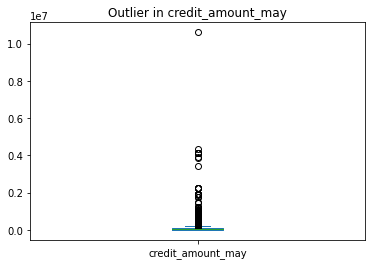

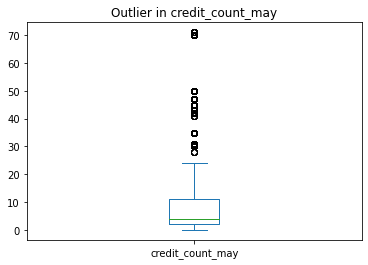

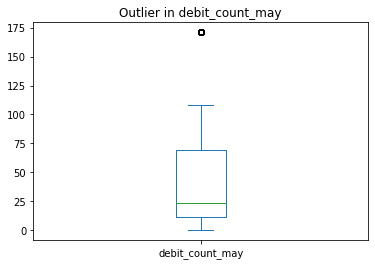

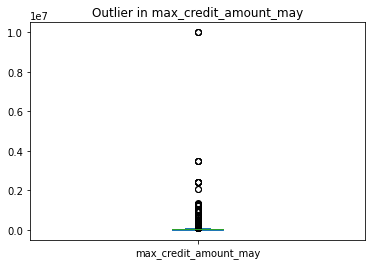

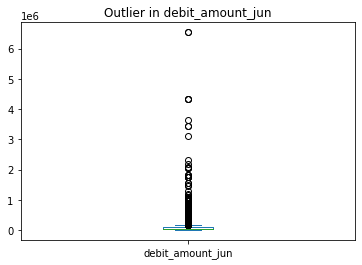

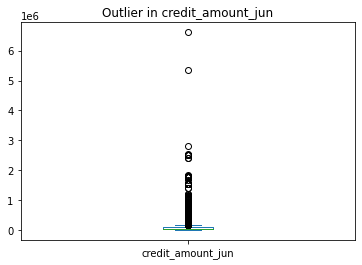

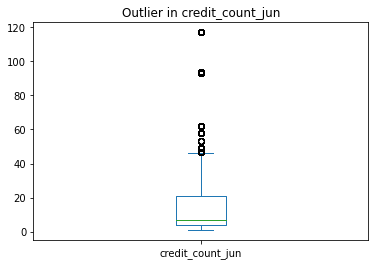

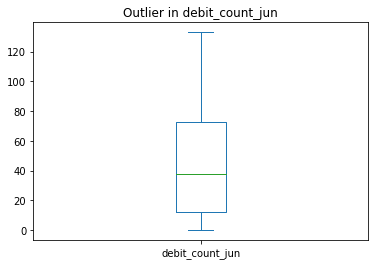

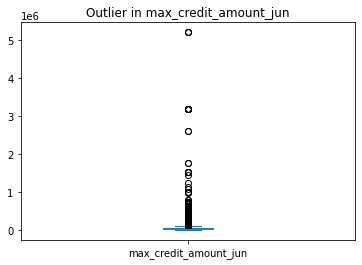

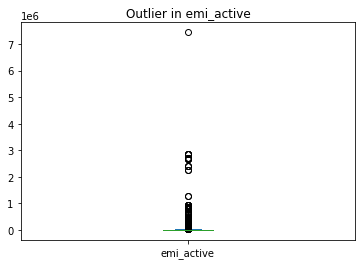

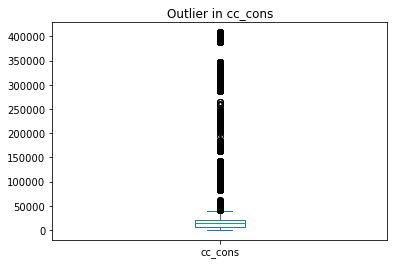

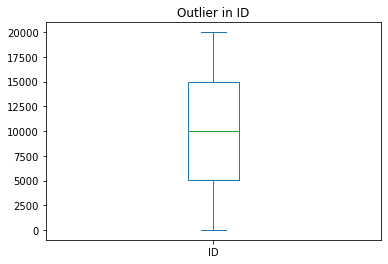

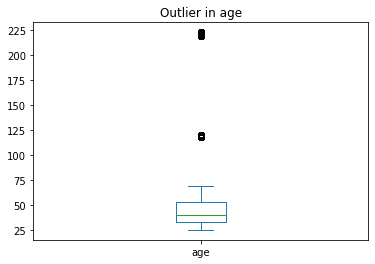

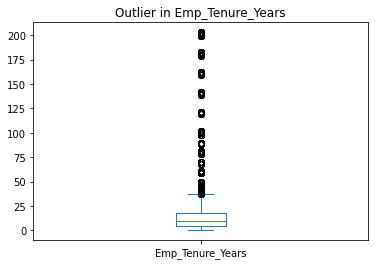

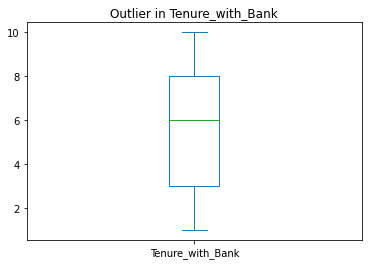

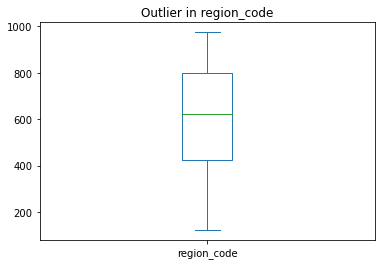

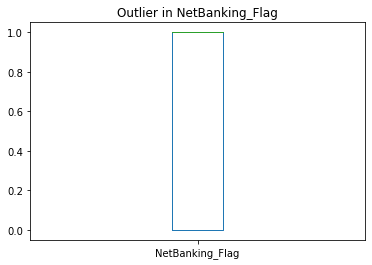

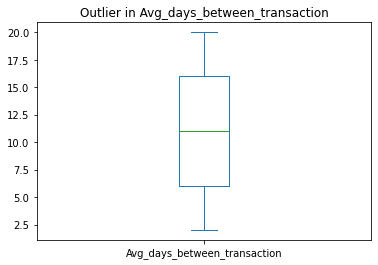

In [22]:
# Checking for outliers

for i in df_num.columns:
    plt.figure()
    plt.title(f"Outlier in {i}")
    df_num[i].plot(kind='box')

##### More or less there are outliers in every column

In [23]:
# Exploring Categorical Variables
df_cat=df.select_dtypes(include='object')
df_cat.head()

,loan_enq,account_type,gender,Income
0,Y,current,M,MEDIUM
1,Y,current,F,MEDIUM
2,Y,current,M,MEDIUM
3,Y,current,M,MEDIUM
4,Y,current,M,MEDIUM


In [24]:
for i in df_cat.columns:
    print(f"Number of categories in {i} is ",len(df_cat[i].unique()))

Number of categories in loan_enq is  1
Number of categories in account_type is  2
Number of categories in gender is  2
Number of categories in Income is  3


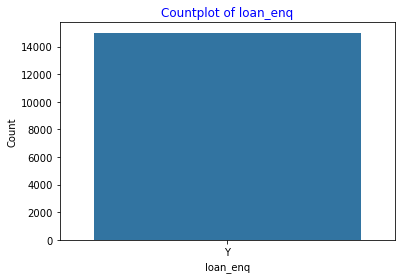

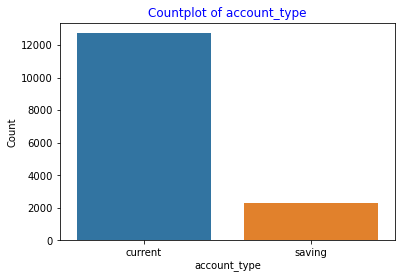

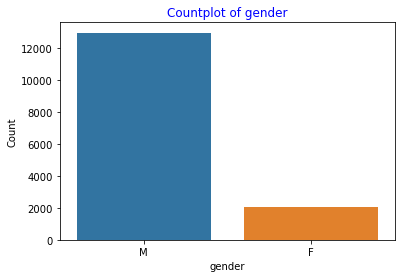

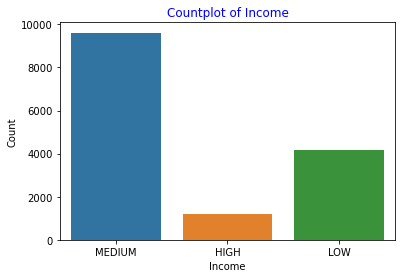

In [25]:
for i in df_cat.columns:
    sns.countplot(data=df, x=i)
    plt.title(f'Countplot of {i}',c='b')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [26]:
df['account_type'].value_counts(normalize=True)

current    0.848406
saving     0.151594
Name: account_type, dtype: float64

##### From the above proportions, we can observe that only 15.1% of the customers have savings account. The majority of account holders, i.e, 84.8% have a current account

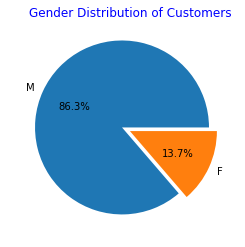

In [27]:
# Gender Distribution of Customers

plt.figure(figsize=(4,4))
df['gender'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%', explode=(0.1, 0))
plt.title('Gender Distribution of Customers',c='b')
plt.ylabel(" ")
plt.show()

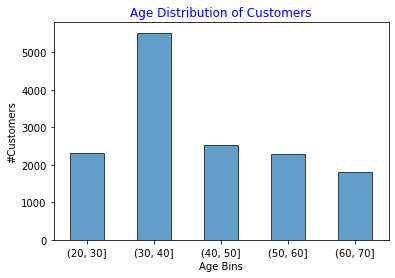

In [28]:
# Age Distribution of Customers

bins = [20, 30, 40, 50, 60, 70]
df['Age_Bin'] = pd.cut(df['age'], bins=bins)
bin_counts = df['Age_Bin'].value_counts()
bin_counts = df['Age_Bin'].value_counts().sort_index()
bin_counts.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.xlabel('Age Bins')
plt.ylabel('#Customers')
plt.xticks(rotation=0)
plt.title('Age Distribution of Customers',c='b')
plt.show()

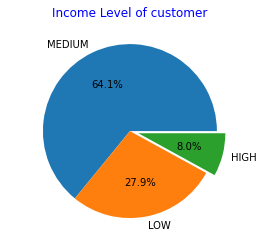

In [29]:
# Income Level of customer

df['Income'].value_counts().plot(kind='pie',autopct='%1.1f%%', explode=(0, 0 ,0.1))
plt.title("Income Level of customer",c='b')
plt.ylabel(" ")
plt.show()

In [30]:
bins_tenure = [2,4, 6, 8,10]
df['Tenure_with_Bank_bins'] = pd.cut(df['Tenure_with_Bank'], bins=bins_tenure)
bin_counts = df['Tenure_with_Bank_bins'].value_counts().sort_index()
pd.DataFrame(bin_counts)

,Tenure_with_Bank_bins
"(2, 4]",3002
"(4, 6]",2991
"(6, 8]",3045
"(8, 10]",2976


In [31]:
# Average tenure for which a customer has been with the bank 

round(df['Tenure_with_Bank'].mean(),2)

5.51

In [32]:
customer_region=df.groupby(by=['region_code']).agg(customer=('region_code','count')).sort_values(by=['customer'],ascending=False).head(10)

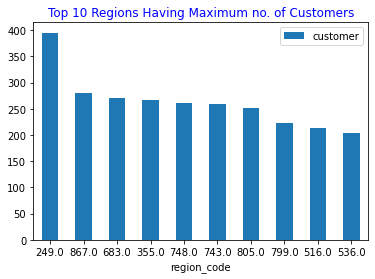

In [33]:
customer_region.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Top 10 Regions Having Maximum no. of Customers',c='b')
plt.show()

In [34]:
df['NetBanking_Flag'].value_counts(normalize=True)

1    0.719688
0    0.280312
Name: NetBanking_Flag, dtype: float64

##### Nearly 72% percentage of customers use net banking for transactions.

In [35]:
# Average no. of days between transactions
round(df['Avg_days_between_transaction'].mean(),0)

11.0

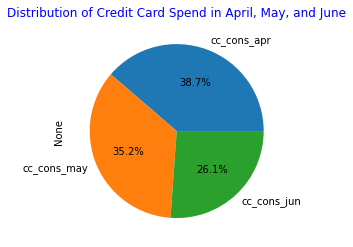

In [36]:
df[['cc_cons_apr','cc_cons_may','cc_cons_jun']].sum().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of Credit Card Spend in April, May, and June',c='b')
plt.show()

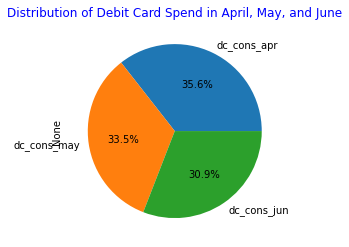

In [37]:
df[['dc_cons_apr','dc_cons_may','dc_cons_jun']].sum().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of Debit Card Spend in April, May, and June',c='b')
plt.show()

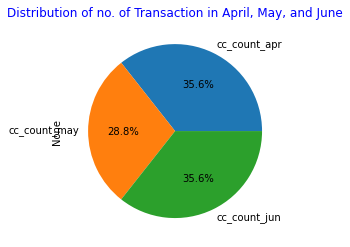

In [38]:
df[['cc_count_apr','cc_count_may','cc_count_jun']].sum().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of no. of Transaction in April, May, and June',c='b')
plt.show()

In [39]:
card_limit = [250000,500000,750000,1000000]

In [40]:
df['card_lim_bin']=pd.cut(df['card_lim'],bins=card_limit,right=True)

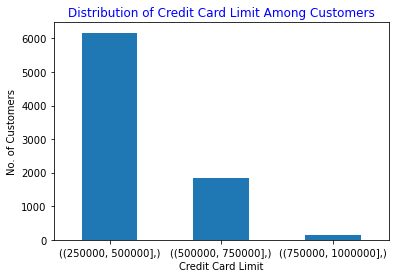

In [41]:
df[['card_lim_bin']].value_counts().plot(kind='bar',)
plt.title("Distribution of Credit Card Limit Among Customers",c='b')
plt.ylabel("No. of Customers")
plt.xlabel("Credit Card Limit")
plt.xticks(rotation=0)
plt.show()

##### Maximum number of customer have limits between 250K to 500K

In [42]:
df['personal_loan_active'].value_counts()

1    14994
Name: personal_loan_active, dtype: int64

In [43]:
df['vehicle_loan_active'].value_counts()

1    14994
Name: vehicle_loan_active, dtype: int64

In [44]:
df['vehicle_loan_closed'].value_counts()

1    14994
Name: vehicle_loan_closed, dtype: int64

In [45]:
df['personal_loan_closed'].value_counts()

1.0    14994
Name: personal_loan_closed, dtype: int64

##### It seems like every customer has an active personal loan and an active vehicle loan as well as a closed personal loan and a closed vehicle loan with another bank.

### This concludes the EDA part of the project, now moving on to the Machine Learning part, where we need to predict credit card consumption.

###### Preparing the dataset for modeling

In [46]:
df.isnull().sum()

cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        0
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        0
cc_count_apr                       0
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               0
vehicle_loan_closed                0
investment_1                       0
investment_2                       0
investment_3                       0
investment_4                       0
debit_amount_apr                   0
credit_amount_apr                  0
debit_count_apr                    0
credit_count_apr                   0
max_credit_amount_apr              0
debit_amount_may                   0
c

In [47]:
df.drop(columns=['Age_Bin', 'Tenure_with_Bank_bins', 'card_lim_bin'], inplace=True)

In [48]:
pred_df.isnull().sum().sum()

5008

In [49]:
pred_df

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,4,47,56,6,125000,1,1,1.0,1,13.80,376600.50,1633.0,-5715.49023,27646.84,44341.00,16.0,36,24485.0,23512.67,41755.00,24,20,9750.0,30527.88,31271.00,3,12,25945.92,Y,1170.49,NaN,17591,current,M,37,MEDIUM,11.9,4,575.0,1,16.0
1,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,4,50,38,31,59000,1,1,1.0,1,101891.25,470000.00,891.0,35346.00000,32247.25,21946.00,42.0,5,3375.0,15049.44,130299.00,43,40,16967.0,14342.83,16582.00,6,39,12214.00,Y,16447.45,NaN,13541,current,M,33,MEDIUM,7.8,6,394.0,0,19.0
2,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,5,24,27,2,49999,1,1,1.0,1,53374.97,674291.83,54101.0,2557.00000,63169.00,36616.50,41.0,6,14950.0,133659.00,40422.00,42,35,36398.0,32503.16,33539.54,5,9,13215.00,Y,2622.28,NaN,13431,current,M,53,LOW,33.0,10,324.0,1,15.0
3,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,71,5,1,11,520000,1,1,1.0,1,9118.35,470000.00,5905.0,5464.00000,39442.80,43173.38,46.0,1,235844.0,99686.03,48148.00,3,5,97825.0,93572.42,109429.75,21,0,72317.00,Y,340.79,NaN,8687,current,M,33,MEDIUM,7.8,5,370.0,1,7.0
4,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,47,5,25,1,152000,1,1,1.0,1,12850544.36,101.24,130000.0,1332.00000,8937.00,15232.00,11.0,1,14495.0,190374.25,25926.00,70,75,27936.0,19011.50,41401.00,6,35,42344.00,Y,2812.20,NaN,14727,current,M,62,LOW,12.6,9,505.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,2,26,595000,1,1,1.0,1,84446.00,961916.90,492.0,553.00000,41314.91,37646.41,6.0,14,27825.0,34952.75,45461.00,35,11,32944.0,105488.53,125470.83,21,50,58037.00,Y,7870.88,NaN,12512,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
4996,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,1,58,13000,1,1,1.0,1,1892440.00,295150.90,10271.0,20324.00000,216.25,1605.00,32.0,26,27912.0,17261.41,85422.00,5,8,8850.0,77112.66,86559.00,62,38,24110.00,Y,3668.30,NaN,14224,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
4997,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,2,17,124000,1,1,1.0,1,115.45,200015.58,30000.0,6885.00000,89327.00,80044.00,32.0,14,14580.0,142002.00,68985.86,10,108,35819.0,57192.48,80627.00,2,18,1769.00,Y,5450.34,NaN,18740,current,M,62,HIGH,37.8,8,863.0,1,16.0
4998,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,1,44,67,371000,1,1,1.0,1,48796.45,1631.11,925.0,10455.00000,191780.00,66057.00,40.0,5,23881.0,156995.05,13558.00,11,12,39083.0,82039.00,24332.00,117,64,37255.00,Y,59.29,NaN,18134,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


In [50]:
df

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.200,130000.00,300500.0,12174.00000,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.00,Y,3448.84,10832.0,14081,current,M,47,MEDIUM,8.1,8,814.0,1,17.0
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.000,3.00,610000.0,2351.00000,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.00,Y,3812.69,179050.0,5124,current,F,27,MEDIUM,6.3,7,249.0,1,7.0
2,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,62,42,360000,1,1,1.0,1,27324.000,176487.60,2156.0,3735.00000,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.00,Y,9432.90,888.0,1119,current,M,35,MEDIUM,4.5,9,958.0,0,9.0
3,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,12,58,155000,1,1,1.0,1,370776.000,63000.00,26241.0,0.00000,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.00,Y,144.61,1856.0,2390,current,M,58,MEDIUM,34.2,10,945.0,1,12.0
4,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,5,80,362000,1,1,1.0,1,10006.200,7216.53,13873.0,-4679.00000,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.00,Y,1887.89,290.0,4322,current,M,32,MEDIUM,10.8,10,249.0,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,55,29,520000,1,1,1.0,1,186189.000,24000.00,16215.0,977.00000,30608.54,31135.00,79.0,2,27608.0,30501.77,23692.00,1,8,6936.0,487751.19,42625.50,14,8,82851.00,Y,78966.76,4263.0,6995,current,F,53,LOW,13.2,9,653.0,1,20.0
14996,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,1,2,472000,1,1,1.0,1,24832.000,221000.00,12337.0,-6281.37988,39903.00,23797.00,43.0,2,30512.0,57918.69,50023.00,4,20,202639.0,8666.01,34987.55,11,18,118110.47,Y,4762.10,11019.0,10376,current,M,44,MEDIUM,2.4,9,535.0,1,2.0
14997,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,3,3,44000,1,1,1.0,1,180615.020,253000.00,25000.0,10210.00000,29525.63,95477.27,4.0,1,41085.0,25404.75,35239.00,43,5,44421.0,97896.48,261432.00,4,73,49545.00,Y,2877.33,404227.0,2181,current,M,37,MEDIUM,3.4,9,464.0,1,8.0
14998,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,9,1,359000,1,1,1.0,1,3299447.136,393982.10,3975.0,-4664.00000,119370.54,59644.00,3.0,29,19110.0,46086.90,82193.00,3,25,22409.0,22693.92,33025.29,3,80,16130.00,Y,13006.84,28813.0,18417,current,M,220,MEDIUM,40.0,10,536.0,1,3.0


In [51]:
df.drop(columns=['ID'], inplace=True)

In [52]:
df

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.200,130000.00,300500.0,12174.00000,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.00,Y,3448.84,10832.0,current,M,47,MEDIUM,8.1,8,814.0,1,17.0
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.000,3.00,610000.0,2351.00000,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.00,Y,3812.69,179050.0,current,F,27,MEDIUM,6.3,7,249.0,1,7.0
2,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,62,42,360000,1,1,1.0,1,27324.000,176487.60,2156.0,3735.00000,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.00,Y,9432.90,888.0,current,M,35,MEDIUM,4.5,9,958.0,0,9.0
3,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,12,58,155000,1,1,1.0,1,370776.000,63000.00,26241.0,0.00000,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.00,Y,144.61,1856.0,current,M,58,MEDIUM,34.2,10,945.0,1,12.0
4,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,5,80,362000,1,1,1.0,1,10006.200,7216.53,13873.0,-4679.00000,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.00,Y,1887.89,290.0,current,M,32,MEDIUM,10.8,10,249.0,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,55,29,520000,1,1,1.0,1,186189.000,24000.00,16215.0,977.00000,30608.54,31135.00,79.0,2,27608.0,30501.77,23692.00,1,8,6936.0,487751.19,42625.50,14,8,82851.00,Y,78966.76,4263.0,current,F,53,LOW,13.2,9,653.0,1,20.0
14996,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,1,2,472000,1,1,1.0,1,24832.000,221000.00,12337.0,-6281.37988,39903.00,23797.00,43.0,2,30512.0,57918.69,50023.00,4,20,202639.0,8666.01,34987.55,11,18,118110.47,Y,4762.10,11019.0,current,M,44,MEDIUM,2.4,9,535.0,1,2.0
14997,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,3,3,44000,1,1,1.0,1,180615.020,253000.00,25000.0,10210.00000,29525.63,95477.27,4.0,1,41085.0,25404.75,35239.00,43,5,44421.0,97896.48,261432.00,4,73,49545.00,Y,2877.33,404227.0,current,M,37,MEDIUM,3.4,9,464.0,1,8.0
14998,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,9,1,359000,1,1,1.0,1,3299447.136,393982.10,3975.0,-4664.00000,119370.54,59644.00,3.0,29,19110.0,46086.90,82193.00,3,25,22409.0,22693.92,33025.29,3,80,16130.00,Y,13006.84,28813.0,current,M,220,MEDIUM,40.0,10,536.0,1,3.0


In [53]:
pred_df.drop('cc_cons',axis=1,inplace=True)

In [54]:
pred_df.isnull().sum().sum()

8

In [55]:
pred_df.dropna(inplace=True)

In [56]:
pred_df.isnull().sum().sum()

0

In [57]:
pred_df.drop(columns=['ID'], inplace=True)

In [58]:
pred_df

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,4,47,56,6,125000,1,1,1.0,1,13.80,376600.50,1633.0,-5715.49023,27646.84,44341.00,16.0,36,24485.0,23512.67,41755.00,24,20,9750.0,30527.88,31271.00,3,12,25945.92,Y,1170.49,current,M,37,MEDIUM,11.9,4,575.0,1,16.0
1,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,4,50,38,31,59000,1,1,1.0,1,101891.25,470000.00,891.0,35346.00000,32247.25,21946.00,42.0,5,3375.0,15049.44,130299.00,43,40,16967.0,14342.83,16582.00,6,39,12214.00,Y,16447.45,current,M,33,MEDIUM,7.8,6,394.0,0,19.0
2,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,5,24,27,2,49999,1,1,1.0,1,53374.97,674291.83,54101.0,2557.00000,63169.00,36616.50,41.0,6,14950.0,133659.00,40422.00,42,35,36398.0,32503.16,33539.54,5,9,13215.00,Y,2622.28,current,M,53,LOW,33.0,10,324.0,1,15.0
3,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,71,5,1,11,520000,1,1,1.0,1,9118.35,470000.00,5905.0,5464.00000,39442.80,43173.38,46.0,1,235844.0,99686.03,48148.00,3,5,97825.0,93572.42,109429.75,21,0,72317.00,Y,340.79,current,M,33,MEDIUM,7.8,5,370.0,1,7.0
4,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,47,5,25,1,152000,1,1,1.0,1,12850544.36,101.24,130000.0,1332.00000,8937.00,15232.00,11.0,1,14495.0,190374.25,25926.00,70,75,27936.0,19011.50,41401.00,6,35,42344.00,Y,2812.20,current,M,62,LOW,12.6,9,505.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,3043.000,742.20,3418.00,2181.94,12032.60,788.00,1.0,5,6,1,25,4,296000,1,1,1.0,1,24832.00,79828.00,24619.0,10210.00000,1573.00,32533.00,16.0,33,13258.0,142200.77,71950.00,16,12,28637.0,79117.70,29339.00,117,1,123000.00,Y,421.64,current,M,60,MEDIUM,24.0,5,968.0,0,9.0
4995,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,2,26,595000,1,1,1.0,1,84446.00,961916.90,492.0,553.00000,41314.91,37646.41,6.0,14,27825.0,34952.75,45461.00,35,11,32944.0,105488.53,125470.83,21,50,58037.00,Y,7870.88,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
4996,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,1,58,13000,1,1,1.0,1,1892440.00,295150.90,10271.0,20324.00000,216.25,1605.00,32.0,26,27912.0,17261.41,85422.00,5,8,8850.0,77112.66,86559.00,62,38,24110.00,Y,3668.30,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
4997,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,2,17,124000,1,1,1.0,1,115.45,200015.58,30000.0,6885.00000,89327.00,80044.00,32.0,14,14580.0,142002.00,68985.86,10,108,35819.0,57192.48,80627.00,2,18,1769.00,Y,5450.34,current,M,62,HIGH,37.8,8,863.0,1,16.0


In [59]:
y=df['cc_cons']

In [60]:
df.drop('cc_cons',axis=1,inplace=True)

In [61]:
df_num_cols=df.select_dtypes(exclude ='object').columns

In [62]:
df_cat_cols=df.select_dtypes(include ='object').columns

In [63]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler , OneHotEncoder ,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , r2_score
from sklearn.feature_selection import SelectKBest ,f_classif

In [64]:
def rmspe(train_preds_pipe1, y_train):
    mask = train_preds_pipe1 != 0
    rmspe = np.sqrt(np.mean(np.square((train_preds_pipe1 - y_train) / train_preds_pipe1)[mask] ** 2))
    return rmspe

###### The user-defined function (UDF) rmspe calculates the Root Mean Square Percentage Error (RMSPE) between the predicted values and the actual values. RMSPE is a common metric used to evaluate the accuracy of regression models, especially in contexts where the percentage error is more meaningful than absolute error. RMSPE is particularly useful in cases where the scale of the data varies significantly, as it normalizes the error relative to the predicted values.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=123)

In [66]:
ct1 = ColumnTransformer(
    transformers=[
    ('olt',RobustScaler(),df_num_cols),
    ('Ohe',OneHotEncoder(drop='first'),df_cat_cols)
                    ])

##### The above code uses ColumnTransformer from the sklearn.compose module to apply different preprocessing transformations to different subsets of columns in a DataFrame. The provided code defines a ColumnTransformer that applies different preprocessing steps to numerical and categorical columns in a DataFrame. RobustScaler is used for scaling numerical columns, making them robust to outliers, and OneHotEncoder is used for encoding categorical columns, with the first category dropped to prevent multicollinearity. This approach streamlines preprocessing and ensures that different types of data are appropriately handled before further analysis or modeling.

In [67]:
lr= LinearRegression()
dt= DecisionTreeRegressor(max_depth=3)
rfr = RandomForestRegressor(max_depth=3)

In [68]:
pipe1=Pipeline(steps=[
    ('col_transformation',ct1),
    ('Feature Selection',SelectKBest(f_classif,k=25)),
    ('linear_regression',lr)
])

In [69]:
pipe2=Pipeline(steps=[
    ('col_transformation',ct1),
    ('Feature Selection',SelectKBest(f_classif,k=25)),
    ('Decision Tree',dt)
])

In [70]:
pipe3=Pipeline(steps=[
    ('col_transformation',ct1),
    ('Feature Selection',SelectKBest(f_classif,k=25)),
    ('Random Forest',rfr)
])

###### The codes provided above defines a machine learning pipeline using Pipeline from the sklearn.pipeline module. A pipeline is a way to streamline a sequence of data processing steps, ensuring that each step in the sequence is applied consistently and in the correct order. 

###### Code Explanation: Summary
- Pipeline: The pipeline ensures that the data processing steps are applied in a sequence, from preprocessing to feature selection to model fitting.
- Column Transformation: The ColumnTransformer (ct1) applies RobustScaler to numerical columns and OneHotEncoder to categorical columns.
- Feature Selection: SelectKBest selects the top 25 features based on the f_classif scoring function.
- Linear Regression/Decision Tree/Random Forest: The linear regression model (lr), decision tree model (dt) and random forest model (rfr) are fitted to the processed and feature-selected data.
- By using a pipeline, you ensure that all steps are performed in the correct order and that the same transformations are applied to both the training and testing data. This is crucial for maintaining the integrity of the model evaluation and deployment process.

In [71]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('col_transformation',
                 ColumnTransformer(transformers=[('olt', RobustScaler(),
                                                  Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed...
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'age',
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction'],
      dtype='object')),
                                                 ('Ohe',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['loan_enq', 'account_type', 'gender', 'Income'], dtype='object'))])),
                ('Feature Selection', SelectKBest(k=2

In [72]:
train_preds_pipe1 = pipe1.predict(X_train)
test_preds_pipe1 = pipe1.predict(X_test)

In [73]:
print("MAE train pipe1 :: ",mean_absolute_error(train_preds_pipe1, y_train))
print("MAE test pipe1 :: ",mean_absolute_error(test_preds_pipe1, y_test))
print("MSE train pipe1 :: ",mean_squared_error(train_preds_pipe1, y_train))
print("MSE test pipe1 :: ",mean_squared_error(test_preds_pipe1, y_test))
print("RMSPE train pipe1 :: ",rmspe(train_preds_pipe1,y_train))
print("RMSPE test pipe1 :: ",rmspe(test_preds_pipe1,y_test))

MAE train pipe1 ::  69167.85539257496
MAE test pipe1 ::  70005.01790284945
MSE train pipe1 ::  9455836024.333158
MSE test pipe1 ::  9669353551.628736
RMSPE train pipe1 ::  8.315895951257323
RMSPE test pipe1 ::  8.534520566967478


In [74]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('col_transformation',
                 ColumnTransformer(transformers=[('olt', RobustScaler(),
                                                  Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed...
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'age',
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction'],
      dtype='object')),
                                                 ('Ohe',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['loan_enq', 'account_type', 'gender', 'Income'], dtype='object'))])),
                ('Feature Selection', SelectKBest(k=2

In [75]:
train_preds_pipe2 = pipe2.predict(X_train)
test_preds_pipe2 = pipe2.predict(X_test)

In [76]:
print("MAE train pipe2 :: ",mean_absolute_error(train_preds_pipe2, y_train))
print("MAE test pipe2 :: ",mean_absolute_error(test_preds_pipe2, y_test))
print("MAPE train pipe2 :: ",mean_absolute_percentage_error(train_preds_pipe2, y_train))
print("MAPE test pipe2 :: ",mean_absolute_percentage_error(test_preds_pipe2, y_test))
print("RMSPE train pipe2 :: ",rmspe(train_preds_pipe2,y_train))
print("RMSPE test pipe2 :: ",rmspe(test_preds_pipe2,y_test))

MAE train pipe2 ::  69042.32794883181
MAE test pipe2 ::  70259.95773658509
MAPE train pipe2 ::  1.26731745186244
MAPE test pipe2 ::  1.2920368308272703
RMSPE train pipe2 ::  8.223923832717652
RMSPE test pipe2 ::  8.548819233662071


In [77]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('col_transformation',
                 ColumnTransformer(transformers=[('olt', RobustScaler(),
                                                  Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed...
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'age',
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction'],
      dtype='object')),
                                                 ('Ohe',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['loan_enq', 'account_type', 'gender', 'Income'], dtype='object'))])),
                ('Feature Selection', SelectKBest(k=2

In [78]:
train_preds_pipe3 = pipe3.predict(X_train)
test_preds_pipe3 = pipe3.predict(X_test)

In [79]:
print("MAE train pipe3 :: ",mean_absolute_error(train_preds_pipe3, y_train))
print("MAE test  pipe3 :: ",mean_absolute_error(test_preds_pipe3, y_test))
print("MAPE train  pipe3 :: ",mean_absolute_percentage_error(train_preds_pipe3, y_train))
print("MAPE test  pipe3 :: ",mean_absolute_percentage_error(test_preds_pipe3, y_test))
print("RMSPE train pipe3 :: ",rmspe(train_preds_pipe3,y_train))
print("RMSPE test pipe3 :: ",rmspe(test_preds_pipe3,y_test))

MAE train pipe3 ::  68999.27828167842
MAE test  pipe3 ::  70124.20959123387
MAPE train  pipe3 ::  1.2532902577234915
MAPE test  pipe3 ::  1.2866255975279948
RMSPE train pipe3 ::  7.626006201737656
RMSPE test pipe3 ::  8.177537508694636


In [80]:
i=1
for pipe in [pipe1,pipe2,pipe3]:
    pipe.fit(X_train,y_train)
    train_preds_pipe = pipe.predict(X_train)
    test_preds_pipe = pipe.predict(X_test)    
    print(f"RMSPE train {pipe.__class__.__name__}{i} :: ", rmspe(train_preds_pipe, y_train))
    print(f"RMSPE test {pipe.__class__.__name__}{i}:: ", rmspe(test_preds_pipe, y_test))
    print(" ")
    i+=1

RMSPE train Pipeline1 ::  8.315895951257323
RMSPE test Pipeline1::  8.534520566967478
 
RMSPE train Pipeline2 ::  8.223923832717652
RMSPE test Pipeline2::  8.548820753202923
 
RMSPE train Pipeline3 ::  7.699849457026414
RMSPE test Pipeline3::  8.24110779158209
 


###### From the above RMSPE metrics we can see that each of the pipelines, Pipeline 1 (Linear Regression), Pipeline 2 (DecisionTreeRegressor) and Pipeline 3 (RandomForestRegressor) have low RMSPE values for both the training and test dataset.However, Random Forest Regressor has a marginally lower RMSPE than the other two.

###### The RMSPE expresses the prediction error as a percentage of the actual values, making it easier to interpret the performance of the model in relative terms.

###### A lower RMSPE value indicates better model performance, meaning that the model's predictions are closer to the actual values. For example, an RMSPE of 0.15 (or 15%). This means that, on average, the model's predictions deviate from the actual values by 15% of the actual values.

###### Good Model: An RMSPE close to 0 indicates a model with high predictive accuracy.

###### Moderate Model: An RMSPE between 10% and 20% might indicate a model that has reasonable predictive accuracy but could still benefit from further tuning or additional features.

###### Poor Model: An RMSPE above 20% suggests that the model's predictions are significantly off from the actual values, indicating the need for substantial improvements.

# Since, each of the models have RMSPE values more or less similar to each other. We can use either of them to predict the target variable, 'cc_cons'. I will choose Pipe 3 i.e, Random Forest Regressor

In [81]:
pred=pd.DataFrame(pipe3.predict(pred_df))

In [82]:
pred_df = pred_df.reset_index(drop = True)

In [83]:
pred_df['pred_cc_cons']=pred

In [84]:
pred_df

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,pred_cc_cons
0,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,4,47,56,6,125000,1,1,1.0,1,13.80,376600.50,1633.0,-5715.49023,27646.84,44341.00,16.0,36,24485.0,23512.67,41755.00,24,20,9750.0,30527.88,31271.00,3,12,25945.92,Y,1170.49,current,M,37,MEDIUM,11.9,4,575.0,1,16.0,56637.745942
1,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,4,50,38,31,59000,1,1,1.0,1,101891.25,470000.00,891.0,35346.00000,32247.25,21946.00,42.0,5,3375.0,15049.44,130299.00,43,40,16967.0,14342.83,16582.00,6,39,12214.00,Y,16447.45,current,M,33,MEDIUM,7.8,6,394.0,0,19.0,57004.548526
2,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,5,24,27,2,49999,1,1,1.0,1,53374.97,674291.83,54101.0,2557.00000,63169.00,36616.50,41.0,6,14950.0,133659.00,40422.00,42,35,36398.0,32503.16,33539.54,5,9,13215.00,Y,2622.28,current,M,53,LOW,33.0,10,324.0,1,15.0,55058.123482
3,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,71,5,1,11,520000,1,1,1.0,1,9118.35,470000.00,5905.0,5464.00000,39442.80,43173.38,46.0,1,235844.0,99686.03,48148.00,3,5,97825.0,93572.42,109429.75,21,0,72317.00,Y,340.79,current,M,33,MEDIUM,7.8,5,370.0,1,7.0,54259.967949
4,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,47,5,25,1,152000,1,1,1.0,1,12850544.36,101.24,130000.0,1332.00000,8937.00,15232.00,11.0,1,14495.0,190374.25,25926.00,70,75,27936.0,19011.50,41401.00,6,35,42344.00,Y,2812.20,current,M,62,LOW,12.6,9,505.0,1,3.0,53501.648704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,3043.000,742.20,3418.00,2181.94,12032.60,788.00,1.0,5,6,1,25,4,296000,1,1,1.0,1,24832.00,79828.00,24619.0,10210.00000,1573.00,32533.00,16.0,33,13258.0,142200.77,71950.00,16,12,28637.0,79117.70,29339.00,117,1,123000.00,Y,421.64,current,M,60,MEDIUM,24.0,5,968.0,0,9.0,51921.793436
4989,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,2,26,595000,1,1,1.0,1,84446.00,961916.90,492.0,553.00000,41314.91,37646.41,6.0,14,27825.0,34952.75,45461.00,35,11,32944.0,105488.53,125470.83,21,50,58037.00,Y,7870.88,current,M,35,MEDIUM,13.5,1,523.0,0,7.0,53844.544773
4990,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,1,58,13000,1,1,1.0,1,1892440.00,295150.90,10271.0,20324.00000,216.25,1605.00,32.0,26,27912.0,17261.41,85422.00,5,8,8850.0,77112.66,86559.00,62,38,24110.00,Y,3668.30,current,M,53,MEDIUM,9.9,7,723.0,1,2.0,55334.399793
4991,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,2,17,124000,1,1,1.0,1,115.45,200015.58,30000.0,6885.00000,89327.00,80044.00,32.0,14,14580.0,142002.00,68985.86,10,108,35819.0,57192.48,80627.00,2,18,1769.00,Y,5450.34,current,M,62,HIGH,37.8,8,863.0,1,16.0,54055.396884
